In [90]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer

import re
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

# https://www.geeksforgeeks.org/python-nlp-analysis-of-restaurant-reviews/

In [2]:
instrument_reviews = pd.read_csv('Musical_instruments_reviews.csv')
instrument_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [3]:
columns = ['reviewText', 'overall']
df = instrument_reviews[columns]
df.head(10)

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0
5,So good that I bought another one. Love the h...,5.0
6,"I have used monster cables for years, and with...",5.0
7,I now use this cable to run from the output of...,3.0
8,Perfect for my Epiphone Sheraton II. Monster ...,5.0
9,Monster makes the best cables and a lifetime w...,5.0


In [4]:
df['target'] = df.overall.apply(lambda x: 1 if x>=4.0 else 0)
df.head()

<ipython-input-4-b0e4f3507851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df.overall.apply(lambda x: 1 if x>=4.0 else 0)


,reviewText,overall,target
0,"Not much to write about here, but it does exac...",5.0,1
1,The product does exactly as it should and is q...,5.0,1
2,The primary job of this device is to block the...,5.0,1
3,Nice windscreen protects my MXL mic and preven...,5.0,1
4,This pop filter is great. It looks and perform...,5.0,1


In [5]:
type(df['reviewText'])
df['reviewText'] = df.reviewText.apply(str)

<ipython-input-5-710e52ca2f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df.reviewText.apply(str)


# Bag of Words

In [6]:
stopWords = stopwords.words('english')
lemma = WordNetLemmatizer()
# Initialize empty array
# to append clean text
corpus = []
 
# 10262 (reviews) rows to clean
for i in range(0, 10261):
     
    # remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', df['reviewText'][i])
     
    # convert all cases to lower cases
    review = review.lower()
     
    # split to array(default delimiter is " ")
    review = review.split()
     
    # loop for stemming each word
    # in string array at ith row   
    review = [lemma.lemmatize(word) for word in review if word not in stopWords]
                 
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review) 
     
    # append each string to create
    # array of clean text
    corpus.append(review)

In [7]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [253]:
import heapq
mostFreq = heapq.nlargest(1500, wordfreq, key=wordfreq.get)

In [254]:
sortWords = sorted(wordfreq.items(), key=lambda x: x[1], reverse=True)

for i in sort_words:
	print(i[0], i[1])

guitar 6847
one 4946
string 4724
sound 4704
great 4123
like 4033
good 3815
use 3789
pedal 3683
well 3236
work 3129
get 2967
amp 2515
would 2389
price 2297
pick 2288
really 2243
little 2055
much 2003
time 1897
quality 1823
tone 1817
also 1781
used 1762
make 1746
cable 1739
nice 1709
better 1691
tuner 1670
stand 1664
strap 1624
need 1603
thing 1497
easy 1483
using 1433
play 1431
bought 1403
product 1362
mic 1330
even 1310
year 1287
go 1253
buy 1249
playing 1236
look 1207
want 1203
way 1195
set 1185
acoustic 1149
made 1129
got 1127
still 1094
case 1080
say 1064
love 1053
right 1048
feel 1047
instrument 1038
bit 1037
back 1036
two 1031
lot 1011
bass 1010
fit 1004
first 995
best 994
problem 982
could 972
come 966
put 958
fender 957
enough 937
small 920
around 918
recommend 913
without 908
long 905
end 902
think 888
new 879
give 876
hold 872
effect 870
tune 870
cheap 854
last 847
keep 846
le 843
light 822
another 817
know 815
capo 815
take 809
high 807
different 804
pretty 800
power 796
find

speed 82
em 82
window 82
alone 81
cant 81
term 81
stomp 81
cabinet 81
protect 81
danelectro 81
lightweight 81
thank 81
sense 81
obviously 81
require 80
separate 80
plate 80
squier 80
additional 79
iii 79
tough 79
sitting 79
oil 79
copy 79
proper 78
dozen 78
trust 78
actual 78
forward 78
lack 78
breaking 78
middle 78
dirty 78
service 78
coil 77
description 77
condition 77
clarity 77
wind 77
seller 77
intended 77
saying 77
release 77
stratocaster 77
telecaster 77
ii 76
shipped 76
limited 76
tele 76
held 76
changed 76
ended 76
musical 76
shock 76
depending 76
behind 76
intonation 76
storage 76
gone 75
required 75
eye 75
expecting 75
switching 75
tank 75
mention 75
looper 75
practicing 74
connected 74
afford 74
face 74
application 74
forget 74
zoom 74
harmonica 74
k 74
unfortunately 74
f 74
serious 74
turning 74
provides 74
reasonably 73
adding 73
road 73
entire 73
placed 73
cleaning 73
described 73
poor 73
via 73
perform 72
call 72
electronics 72
louder 72
toy 72
kept 72
session 72
patter

isnt 20
detect 20
packing 20
jacket 20
die 20
split 20
snob 20
cheapo 20
applied 20
aux 20
dealer 20
credit 20
vertical 20
boogie 20
karaoke 20
quit 20
pg 20
accommodate 20
member 20
connects 20
enclosure 20
scratching 20
nobody 20
staying 20
fretting 20
fool 20
ratio 20
asked 20
wiring 20
game 20
bluesy 20
glossy 20
consideration 20
breaker 20
keeper 20
matching 20
satriani 20
gilmour 20
alright 20
frontman 20
blast 20
complex 20
bassman 20
frustrating 20
truth 20
entirely 20
bbe 20
bluegrass 20
safety 20
existing 20
closest 20
boot 20
varying 20
metallic 20
snowball 20
consistently 20
posted 20
amplify 20
onstage 20
adult 20
ultex 20
celluloid 20
motion 20
lint 20
unbelievable 20
resistance 20
applicator 20
national 20
steady 20
ish 20
method 20
hype 20
reality 20
rip 20
defect 20
sadly 20
spruce 20
diamond 20
pearl 20
strike 20
comparable 20
coding 20
transmitter 20
hissing 20
gb 20
reverse 20
crate 20
silly 20
apartment 20
reverbs 20
pitchblack 20
dvd 20
automatically 20
quicker 20

weigh 8
vibrate 8
reproducing 8
alike 8
thankfully 8
slack 8
decently 8
gray 8
remained 8
acoustically 8
index 8
triangle 8
obtain 8
fish 8
unused 8
stink 8
earned 8
offs 8
earnie 8
notably 8
timely 8
sexy 8
extends 8
coast 8
kazoo 8
community 8
greasy 8
witch 8
washing 8
omni 8
template 8
million 8
satisfying 8
twangy 8
gorgeous 8
chromacast 8
aid 8
collapsible 8
alongside 8
drunk 8
contain 8
ala 8
integrated 8
requested 8
successfully 8
inadvertently 8
dunno 8
spacing 8
finer 8
dna 8
sanded 8
filing 8
drawing 8
fatter 8
gun 8
bore 8
nearby 8
functionally 8
attest 8
prolonged 8
overnight 8
nicest 8
secondary 8
whatnot 8
reply 8
enthusiast 8
om 8
tilting 8
wobble 8
collecting 8
growl 8
standalone 8
relying 8
anon 8
distort 8
firth 8
unity 8
sensing 8
corrected 8
sens 8
laminated 8
editor 8
clever 8
empty 8
evening 8
crowded 8
pile 8
magical 8
struck 8
researching 8
unstable 8
installs 8
pilot 8
beloved 8
invention 8
picker 8
wiggle 8
davas 8
dance 8
dimly 8
laid 8
wasting 8
nonetheless

reveals 4
dampening 4
aria 4
expose 4
existent 4
pk 4
spoiled 4
shifted 4
intriguing 4
rinse 4
extensive 4
oasis 4
guesswork 4
refill 4
redesign 4
foolish 4
inability 4
property 4
lag 4
shining 4
inclusion 4
choise 4
cam 4
helicon 4
teenage 4
sigh 4
miked 4
blackstar 4
definetely 4
suprised 4
oktava 4
useing 4
oscillation 4
tomorrow 4
naked 4
mud 4
prolly 4
placebo 4
cop 4
mia 4
frusciante 4
pearse 4
torture 4
wit 4
thes 4
approx 4
rendered 4
shaky 4
rendering 4
flamenco 4
rant 4
asks 4
dreaded 4
turner 4
trimmed 4
composition 4
roadie 4
diagonal 4
fry 4
unwind 4
til 4
thursday 4
bic 4
tipped 4
tiring 4
emery 4
alcohol 4
weathered 4
carnuba 4
arthritis 4
retuning 4
reorder 4
standby 4
whilst 4
unclip 4
retuned 4
casually 4
tome 4
food 4
aggressively 4
oxygen 4
chew 4
sps 4
lifespan 4
necessity 4
strand 4
ergo 4
mildly 4
neon 4
evo 4
assist 4
traditionally 4
essence 4
eighth 4
cleanest 4
bushing 4
japan 4
rebuild 4
refurbished 4
butterfly 4
exercise 4
undue 4
secures 4
smash 4
warrant 4

caillat 2
greenish 2
dumping 2
tarnishing 2
possession 2
doe 2
concluded 2
preferable 2
recommendable 2
explorer 2
radically 2
hound 2
doo 2
progressing 2
smooshed 2
notwithstanding 2
perimeter 2
dissapoint 2
msrp 2
aout 2
deadens 2
valveking 2
dimarzios 2
hmm 2
fussing 2
negotiate 2
capped 2
zakk 2
dipped 2
shimmed 2
squiers 2
withd 2
ecg 2
defender 2
resell 2
persuaded 2
hue 2
tak 2
jay 2
mahagony 2
matic 2
authorized 2
whirlwind 2
korn 2
slayer 2
conections 2
ob 2
painter 2
kurt 2
cobain 2
distorting 2
jtm 2
entitled 2
nation 2
nickelback 2
taiwan 2
carlos 2
dinosaur 2
jones 2
pistol 2
moore 2
nostalgia 2
stale 2
humbucking 2
megadeth 2
randall 2
excluding 2
cheapskate 2
staticy 2
deltalab 2
born 2
bayou 2
utterly 2
manipulation 2
sl 2
steroid 2
jagged 2
fishbowl 2
morello 2
futile 2
rediculous 2
thunk 2
cae 2
freq 2
mechanically 2
unified 2
zap 2
acknowledge 2
russell 2
piss 2
gripped 2
shouldnt 2
welll 2
riser 2
avenge 2
comming 2
reward 2
join 2
wantto 2
stomach 2
grinding 2
sand

yout 2
peaky 2
albert 2
collins 2
searing 2
chased 2
deliverance 2
snatched 2
lulz 2
figuratively 2
hoot 2
burgundy 2
coveted 2
lark 2
rythm 2
woodstock 2
waking 2
brough 2
adorable 2
galore 2
dreamed 2
evoke 2
shebang 2
humor 2
rainy 2
gouge 2
remembers 2
vu 2
strummers 2
tlc 2
blender 2
frail 2
retrofit 2
equalize 2
arse 2
minimalistic 2
cellulose 2
unzip 2
objectionable 2
bothersome 2
trepidation 2
flathead 2
october 2
justifiable 2
explains 2
regen 2
nah 2
dremel 2
groovy 2
mash 2
danelectrode 2
electrode 2
detuned 2
lukewarm 2
chipboard 2
rickety 2
rackmount 2
rectified 2
tweeking 2
bull 2
theft 2
flexability 2
contributes 2
heath 2
ux 2
mistakenly 2
paging 2
xy 2
treating 2
oactaves 2
numerical 2
wholly 2
dynamically 2
kmc 2
forefront 2
polyurethane 2
gleaming 2
meguiars 2
blems 2
easilly 2
waxy 2
patented 2
elevating 2
girth 2
pivoting 2
hamilton 2
denting 2
flooring 2
xxl 2
seasick 2
shatter 2
borderline 2
marriage 2
walker 2
williams 2
thumbnail 2
colorless 2
scrub 2
relaxed 2

pog 2
timefactor 2
halo 2
itrack 2
blu 2
stairway 2
bonham 2
implementation 2
woodwind 2
subway 2
sown 2
advertizes 2
goldtop 2
maggot 2
anther 2
plantronics 2
discomfort 2
carlsberg 2
unwated 2
workflow 2
ai 2
ilok 2
cursor 2
clinking 2
dura 2
chocolate 2
foldable 2
segovia 2
mutter 2
exh 2
frickin 2
pincer 2
convertor 2
crapple 2
collaborating 2
smelling 1
aroma 1
ofmonster 1
plugto 1
ypt 1
roc 1
soc 1
warantee 1
eligibility 1
overestimated 1
realtively 1
satified 1
soundproof 1
repairable 1
releaf 1
tangleing 1
gooey 1
overwrap 1
enters 1
disproves 1
inconsequential 1
neverhad 1
rigger 1
thistype 1
thatyou 1
aseven 1
havn 1
mating 1
kodak 1
zi 1
vixia 1
nikon 1
mypowerwerks 1
systeminto 1
daisychained 1
electromagnetic 1
sinlge 1
dv 1
sharkbehringer 1
fbq 1
destroyerto 1
returnsmackie 1
mixeri 1
caig 1
hightly 1
differnce 1
stake 1
lepai 1
iphones 1
forgiven 1
pgxkc 1
psc 1
bue 1
onlinecarstereo 1
eithout 1
mesws 1
fanciest 1
recomed 1
gentleman 1
introdustions 1
oxit 1
hah 1
cleari

soonest 1
diddly 1
dulls 1
totex 1
shiner 1
reflective 1
tipdunlop 1
classiest 1
chevelle 1
turqouise 1
wonderfull 1
packageing 1
tortose 1
pearloid 1
duribility 1
turquoise 1
exhaust 1
azure 1
lended 1
squealies 1
divided 1
reordering 1
seashell 1
farce 1
momentarily 1
apr 1
andepiphone 1
sunburstelectrics 1
medieval 1
stinkylungs 1
buttoned 1
ubass 1
outlasted 1
incre 1
iacute 1
ble 1
outrageously 1
hdmi 1
fling 1
replacememts 1
intermittence 1
plyable 1
everyway 1
unhindered 1
uncut 1
publisher 1
thia 1
strenth 1
prolink 1
spector 1
reead 1
expensivemonster 1
bling 1
verifying 1
inexpensiveepiphone 1
highlighter 1
swab 1
fabrication 1
dividens 1
respose 1
befront 1
herre 1
normalcy 1
expecteda 1
durabilitythe 1
conclusioni 1
sheathe 1
diaddario 1
obtaining 1
peso 1
unbearably 1
symphony 1
unwrapped 1
cheapen 1
simplifying 1
decode 1
mello 1
addict 1
adamas 1
thst 1
enrich 1
punctuate 1
innate 1
slickness 1
sapping 1
aggresive 1
connecticut 1
phosphur 1
perspired 1
thicknessed 1
degr

wasy 1
poratble 1
windy 1
disassembly 1
softbound 1
affortable 1
theremin 1
grohl 1
thow 1
teek 1
shadow 1
bruising 1
rewire 1
organically 1
settngs 1
sludge 1
buzzo 1
melvins 1
indestructability 1
myth 1
sux 1
nooned 1
insanity 1
putted 1
uphold 1
adhering 1
fulfils 1
withdraw 1
strict 1
lemony 1
livening 1
lubrication 1
stir 1
hippie 1
utilizes 1
dabber 1
detergent 1
loaner 1
liberally 1
buckling 1
grabby 1
sqeaky 1
grundgy 1
nourished 1
accumulates 1
cheetos 1
warns 1
dispensing 1
amazine 1
controle 1
batteryand 1
keyboardsthru 1
workand 1
mostlly 1
notnecessary 1
thatcontrol 1
ful 1
cutie 1
dba 1
onsome 1
forlate 1
nite 1
cellophane 1
astound 1
mercy 1
hauled 1
phoenix 1
magnificently 1
walsh 1
reamp 1
unshaped 1
excite 1
isf 1
notching 1
comon 1
wether 1
guitarother 1
smartened 1
rigorously 1
approve 1
mandrel 1
jewlery 1
clasical 1
humpty 1
chuck 1
barry 1
lke 1
untuned 1
exspecially 1
observant 1
delegated 1
mystique 1
infallible 1
discouraging 1
shar 1
overture 1
premiere 1
dom

quietest 1
eon 1
weakest 1
shabby 1
understatement 1
vdrums 1
fader 1
adjustements 1
lesse 1
satisfatory 1
forabout 1
thereturn 1
rapper 1
shrilling 1
newbs 1
rainsong 1
throbbing 1
facs 1
compacl 1
begging 1
tenacious 1
destiny 1
replica 1
twss 1
fathered 1
brady 1
imd 1
improvised 1
liitle 1
european 1
noiselessly 1
mh 1
weinersnitchel 1
sushi 1
coinstar 1
scrouge 1
auvio 1
beyerdynamic 1
fortified 1
wallah 1
junction 1
chane 1
massively 1
hendrixish 1
mosquito 1
tinkerer 1
modder 1
transparently 1
ouput 1
injected 1
destructed 1
glaring 1
cruz 1
sterility 1
erego 1
incl 1
breadth 1
disactivate 1
usebehringer 1
vetta 1
liberating 1
transtube 1
litterally 1
ballance 1
yourelf 1
riggors 1
writes 1
parkway 1
diode 1
icepicky 1
retire 1
implicit 1
grittier 1
muscled 1
mouser 1
tubelike 1
rethinking 1
btr 1
justly 1
actuated 1
butthis 1
aussie 1
actuallystill 1
jmc 1
sweetness 1
jca 1
muscian 1
relaxation 1
latly 1
tiresome 1
brittish 1
flicker 1
desernable 1
surepost 1
insutment 1
amazme

tunnin 1
tht 1
pedalthese 1
goodi 1
trevor 1
rabin 1
divebombs 1
detuningit 1
copiesit 1
bargainit 1
pedalboardif 1
profess 1
greatcons 1
dickey 1
betts 1
fulling 1
tracked 1
behring 1
curse 1
lizzy 1
bryan 1
queensryche 1
rds 1
harmonizing 1
sweetening 1
geting 1
withdanelectro 1
delaywell 1
messign 1
snobbed 1
batt 1
repeater 1
dotted 1
unhooked 1
highend 1
delux 1
simliar 1
morely 1
ecv 1
reverby 1
vintagy 1
slapstick 1
dreamy 1
subtile 1
trimpots 1
founder 1
jeorge 1
tripps 1
brigade 1
oscillate 1
talkin 1
itgenerated 1
anaolgizer 1
newcomer 1
undeniably 1
haunting 1
proguitarshop 1
micropedal 1
behreinger 1
underwhelmed 1
ethereal 1
reverberation 1
upalso 1
dated 1
apologizing 1
giga 1
rife 1
gated 1
aaaand 1
juno 1
moog 1
nonstop 1
longi 1
endured 1
meltdown 1
fried 1
adi 1
acousticbehringer 1
boosterbehringer 1
shifterbehringer 1
pedalbbe 1
modedigitech 1
dgr 1
pedalelectro 1
pedaljim 1
ier 1
nothesitate 1
differentamps 1
bithard 1
itwhile 1
fixescons 1
warblethe 1
flashesother 

mikro 1
sentiment 1
footpad 1
autoplays 1
finale 1
sibelius 1
handiest 1
congested 1
regrettable 1
lulled 1
kindergartner 1
devotee 1
decked 1
resigning 1
elated 1
reverts 1
basick 1
deter 1
buttonhole 1
pmks 1
plainly 1
promblem 1
cajon 1
mandy 1
whileplaying 1
pancake 1
intellitouches 1
holdout 1
abandon 1
easilyi 1
readability 1
convinience 1
motrya 1
bodyless 1
cecilio 1
ggggrandfather 1
stratovariouses 1
shiney 1
collarbone 1
everest 1
impediment 1
octane 1
mustaine 1
endrant 1
preriphery 1
protest 1
subsidiary 1
excact 1
pnfit 1
renaming 1
baki 1
renamed 1
restarted 1
tascan 1
bak 1
pnf 1
happend 1
woulnd 1
guitarmisc 1
ithighly 1
audiocodec 1
override 1
crashed 1
gotchas 1
toggling 1
reconfigure 1
vi 1
witha 1
canplug 1
overtaken 1
audacityfor 1
qualty 1
requred 1
humms 1
fleshed 1
mxls 1
noice 1
refir 1
likeyo 1
awayit 1
ehso 1
pricehighly 1
brandslike 1
patterning 1
boosta 1
grande 1
echoplex 1
gary 1
blindly 1
lept 1
raidus 1
planting 1
approval 1
berringer 1
plucky 1
sennhie

whizz 1
immovable 1
scattering 1
purcheased 1
damnable 1
cringed 1
propping 1
takemine 1
mcquade 1
ayou 1
carol 1
dupdate 1
thed 1
stringsto 1
capoworks 1
tiptop 1
incur 1
gl 1
satify 1
takin 1
leisurely 1
throatier 1
adgcea 1
transposed 1
inventive 1
shellac 1
mumblety 1
mumble 1
deca 1
humanly 1
merchant 1
enticed 1
breathtaking 1
hifidelity 1
priority 1
heavenly 1
tce 1
dowloaded 1
stero 1
byboard 1
probablybe 1
dipswitches 1
reverbed 1
valvetone 1
bmp 1
punchiness 1
livelier 1
dimensionality 1
versitable 1
toalmost 1
buitar 1
raucous 1
punted 1
expressive 1
vantage 1
sill 1
incongrously 1
woodshedding 1
filming 1
duped 1
hurried 1
mysteriously 1
lastforever 1
toanyone 1
disregarding 1
grandpa 1
burton 1
perfetly 1
lingered 1
fractured 1
soemthing 1
dget 1
ak 1
arcrhtop 1
unlined 1
resort 1
billion 1
typing 1
justifiably 1
hsh 1
peave 1
callahan 1
avg 1
thrasher 1
amapleorrosewoodneck 1
backorder 1
happiness 1
beautful 1
getter 1
togther 1
sector 1
grouped 1
recital 1
promotion 1
mu

widened 1
bungie 1
adjusment 1
tensioning 1
cabinetorange 1
cabinetas 1
msd 1
champnow 1
detailsthe 1
sylvania 1
britain 1
rubannoyance 1
mitigation 1
ungrounded 1
hts 1
summaryafter 1
gag 1
heady 1
buckers 1
gutless 1
blackburn 1
updatetook 1
marschall 1
tubey 1
updatetried 1
gf 1
integrates 1
purse 1
wellas 1
useit 1
tightest 1
downi 1
condensing 1
reconfiguring 1
jerked 1
cali 1
smelled 1
tunercons 1
chic 1
adaptive 1
essing 1
hvr 1
modifier 1
bett 1
chainedpowerwerks 1
systemheads 1
transformed 1
umm 1
timbral 1
chorused 1
irks 1
powerhouse 1
reecho 1
qwik 1
shipper 1
vodoo 1
quietler 1
bothoutput 1
majoyo 1
mavisual 1
ripoffs 1
brew 1
hove 1
numeral 1
combat 1
staging 1
iflavor 1
pathetically 1
ziotek 1
unlistenable 1
zepplin 1
unreleased 1
implied 1
dazed 1
pedestrian 1
kashmir 1
riveting 1
awesomeness 1
defies 1
witness 1
reunion 1
sf 1
rio 1
paris 1
tokyo 1
toneprints 1
galaxy 1
coincides 1
quantize 1
funner 1
rhythem 1
adjustible 1
gearlux 1
mybelmonte 1
deluxein 1
analeratec 

In [255]:
mostCommonWords = sortWords[0:1499]

In [256]:
print(mostCommonWords)

[('guitar', 6847), ('one', 4946), ('string', 4724), ('sound', 4704), ('great', 4123), ('like', 4033), ('good', 3815), ('use', 3789), ('pedal', 3683), ('well', 3236), ('work', 3129), ('get', 2967), ('amp', 2515), ('would', 2389), ('price', 2297), ('pick', 2288), ('really', 2243), ('little', 2055), ('much', 2003), ('time', 1897), ('quality', 1823), ('tone', 1817), ('also', 1781), ('used', 1762), ('make', 1746), ('cable', 1739), ('nice', 1709), ('better', 1691), ('tuner', 1670), ('stand', 1664), ('strap', 1624), ('need', 1603), ('thing', 1497), ('easy', 1483), ('using', 1433), ('play', 1431), ('bought', 1403), ('product', 1362), ('mic', 1330), ('even', 1310), ('year', 1287), ('go', 1253), ('buy', 1249), ('playing', 1236), ('look', 1207), ('want', 1203), ('way', 1195), ('set', 1185), ('acoustic', 1149), ('made', 1129), ('got', 1127), ('still', 1094), ('case', 1080), ('say', 1064), ('love', 1053), ('right', 1048), ('feel', 1047), ('instrument', 1038), ('bit', 1037), ('back', 1036), ('two', 

# WordCloud

Text(0.5, 1.0, 'WordCloud from Reviews')

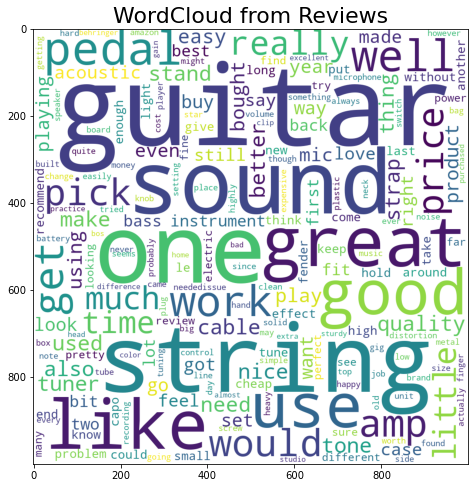

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(wordfreq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud from Reviews", fontsize = 22)

# Models

In [14]:
####
df.dropna(inplace = True)

stopWords = stopwords.words('english')
lemma = WordNetLemmatizer()

def text_preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = [lemma.lemmatize(word) for word in word_tokenize(text) if word not in stopWords]
    text = ' '.join(tokens)
    
    return text

df['cleanText'] = df.reviewText.apply(text_preprocess)
df.head()

<ipython-input-14-c6cea8ff9cb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)
<ipython-input-14-c6cea8ff9cb5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanText'] = df.reviewText.apply(text_preprocess)


,reviewText,overall,target,cleanText
0,"Not much to write about here, but it does exac...",5.0,1,much write exactly supposed filter pop sound r...
1,The product does exactly as it should and is q...,5.0,1,product exactly quite affordable realized doub...
2,The primary job of this device is to block the...,5.0,1,primary job device block breath would otherwis...
3,Nice windscreen protects my MXL mic and preven...,5.0,1,nice windscreen protects mxl mic prevents pop ...
4,This pop filter is great. It looks and perform...,5.0,1,pop filter great look performs like studio fil...


# NLTK Naïve Bayes Model 
Cleaned Data

In [135]:
rating = df['target'].unique()
goodDF = df.loc[df['target'] == rating[1]]
badDF = df.loc[df['target'] == rating[0]]

goodList = goodDF['cleanText'].tolist()

badList = badDF['cleanText'].tolist()

In [136]:
goodToString = ' '.join([str(elem) for elem in goodList])  
badToString = ' '.join([str(elem) for elem in badList])

In [137]:
tokenizer = WhitespaceTokenizer()
filteredListGood = [w for w in tokenizer.tokenize(goodToString)]
filteredListBad = [w for w in tokenizer.tokenize(badToString)]

In [138]:
def word_features(words):
     return dict([(word, True) for word in words.split()])

In [140]:
goodFeatures = [(word_features(f), 'pos') for f in filteredListGood]
badFeatures = [(word_features(f), 'neg') for f in filteredListBad]

labeledWords = goodFeatures + badFeatures

In [196]:
random.shuffle(labeledWords)

In [197]:
labeledWords[0:20]

[({'either': True}, 'neg'),
 ({'people': True}, 'pos'),
 ({'ordered': True}, 'neg'),
 ({'strange': True}, 'pos'),
 ({'good': True}, 'neg'),
 ({'delrin': True}, 'neg'),
 ({'honeytone': True}, 'neg'),
 ({'condenser': True}, 'pos'),
 ({'channel': True}, 'neg'),
 ({'amp': True}, 'neg'),
 ({'stick': True}, 'pos'),
 ({'difference': True}, 'neg'),
 ({'vocal': True}, 'neg'),
 ({'warranty': True}, 'neg'),
 ({'seems': True}, 'neg'),
 ({'disappeared': True}, 'pos'),
 ({'using': True}, 'pos'),
 ({'larger': True}, 'pos'),
 ({'dollar': True}, 'neg'),
 ({'build': True}, 'neg')]

In [143]:
len(labeledWords)

458555

In [198]:
train_set, test_set = labeledWords[321000:], labeledWords[:321000]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [199]:
print(nltk.classify.accuracy(classifier, test_set))

0.8549875389408099


In [200]:
## cross-validation ##
# this function takes the number of folds, the feature sets
# it iterates over the folds, using different sections for training and testing in turn
#   it prints the accuracy for each fold and the average accuracy at the end
def cross_validation_accuracy(num_folds, featuresets):
    subset_size = int(len(featuresets)/num_folds)
    print('Each fold size:', subset_size)
    accuracy_list = []
    # iterate over the folds
    for i in range(num_folds):
        test_this_round = featuresets[(i*subset_size):][:subset_size]
        train_this_round = featuresets[:(i*subset_size)] + featuresets[((i+1)*subset_size):]
        # train using train_this_round
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        # evaluate against test_this_round and save accuracy
        accuracy_this_round = nltk.classify.accuracy(classifier, test_this_round)
        print (i, accuracy_this_round)
        accuracy_list.append(accuracy_this_round)
    # find mean accuracy over all rounds
    print ('mean accuracy', sum(accuracy_list) / num_folds)

In [201]:
# perform the cross-validation : 5-fold
num_folds = 5
cross_validation_accuracy(num_folds, labeledwords)

Each fold size: 91711
0 0.8567783581031719
1 0.8568328771903043
2 0.8560041870658918
3 0.8574871062358932
4 0.8554917076468471
mean accuracy 0.8565188472484216


In [203]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 10
cross_validation_accuracy(num_folds, labeledwords)

Each fold size: 45855
0 0.8594700686947988
1 0.8543670264965653
2 0.8582488278268455
3 0.8561770799258532
4 0.8554356122560244
5 0.8573547050485225
6 0.8568095082324719
7 0.8583142514447716
8 0.854170755642787
9 0.8570930105768182
mean accuracy 0.8567440846145459


In [204]:
features = filteredListGood + filteredListBad

goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))

In [205]:
# Function to compute precision, recall and F1 for each label
#  and for any number of labels
# Input: list of gold labels, list of predicted labels (in same order)
# Output:  prints precision, recall and F1 for each label
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))

# call the function with our data
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
pos 	      0.016      0.293      0.030
neg 	      0.994      0.859      0.922


# NLTK Naïve Bayes Model
Original Data

In [153]:
goodList1 = goodDF['reviewText'].tolist()

badList1 = badDF['reviewText'].tolist()

In [154]:
goodToString1 = ' '.join([str(elem) for elem in goodList1])  
badToString1 = ' '.join([str(elem) for elem in badList1])

In [155]:
filteredListGood1 = [w for w in tokenizer.tokenize(goodToString1)]
filteredListBad1 = [w for w in tokenizer.tokenize(badToString1)]

In [168]:
goodFeatures1 = [(word_features(f), 'pos') for f in filteredListGood1]
badFeatures1 = [(word_features(f), 'neg') for f in filteredListBad1]

labeledWords1 = goodFeatures1 + badFeatures1

In [214]:
random.shuffle(labeledWords1)

In [215]:
labeledWords1[0:20]

[({'the': True}, 'neg'),
 ({'the': True}, 'neg'),
 ({'play': True}, 'neg'),
 ({'me': True}, 'neg'),
 ({'it.': True}, 'neg'),
 ({'strap,': True}, 'neg'),
 ({'I': True}, 'neg'),
 ({'to': True}, 'neg'),
 ({'then': True}, 'neg'),
 ({'Lots': True}, 'neg'),
 ({'bigger': True}, 'neg'),
 ({'out': True}, 'neg'),
 ({'I': True}, 'pos'),
 ({'much': True}, 'neg'),
 ({'be': True}, 'neg'),
 ({'knob': True}, 'neg'),
 ({'played&#34;': True}, 'neg'),
 ({'weeks': True}, 'neg'),
 ({'bad': True}, 'neg'),
 ({'2': True}, 'neg')]

In [171]:
len(labeledWords1)

925378

In [206]:
train_set1, test_set1 = labeledWords1[648000:], labeledWords1[:648000]
classifier1 = nltk.NaiveBayesClassifier.train(train_set1)

In [207]:
print(nltk.classify.accuracy(classifier1, test_set1))

0.8535447530864197


In [208]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, labeledWords1)

Each fold size: 185075
0 0.8549128731595299
1 0.8551992435499122
2 0.8538430366067811
3 0.853675536944482
4 0.8533999729839254
mean accuracy 0.8542061326489261


In [209]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 10
cross_validation_accuracy(num_folds, labeledWords1)

Each fold size: 92537
0 0.8556469304170223
1 0.8545770880836855
2 0.8553227357705566
3 0.8555280590466516
4 0.8536369236089348
5 0.8541448285550645
6 0.8549553151712288
7 0.8524590163934426
8 0.8528048240163394
9 0.8540151506964782
mean accuracy 0.8543090871759406


In [178]:
features1 = filteredListGood1 + filteredListBad1

goldlist1 = []
predictedlist1 = []
for (features1, label) in test_set:
    	goldlist1.append(label)
    	predictedlist1.append(classifier1.classify(features1))

In [179]:
# Function to compute precision, recall and F1 for each label
#  and for any number of labels
# Input: list of gold labels, list of predicted labels (in same order)
# Output:  prints precision, recall and F1 for each label
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))

# call the function with our data
eval_measures(goldlist1, predictedlist1)

	Precision	Recall		F1
pos 	      0.028      0.294      0.051
neg 	      0.989      0.860      0.920


# NLTK Naïve Bayes
Semi-cleaned Data

In [180]:
####
df.dropna(inplace = True)

lemma = WordNetLemmatizer()

def text_preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = [lemma.lemmatize(word) for word in word_tokenize(text)]
    text = ' '.join(tokens)
    
    return text

df['cleanishText'] = df.reviewText.apply(text_preprocess)
df.head()

<ipython-input-180-c94ad4c2fefe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)
<ipython-input-180-c94ad4c2fefe>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanishText'] = df.reviewText.apply(text_preprocess)


,reviewText,overall,target,cleanText,reviewRating,all_features,cleanishText
0,"Not much to write about here, but it does exac...",5.0,1,much write exactly supposed filter pop sound r...,pos,much write exactly supposed filter pop sound r...,not much to write about here but it doe exactl...
1,The product does exactly as it should and is q...,5.0,1,product exactly quite affordable realized doub...,pos,product exactly quite affordable realized doub...,the product doe exactly a it should and is qui...
2,The primary job of this device is to block the...,5.0,1,primary job device block breath would otherwis...,pos,primary job device block breath would otherwis...,the primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...,5.0,1,nice windscreen protects mxl mic prevents pop ...,pos,nice windscreen protects mxl mic prevents pop ...,nice windscreen protects my mxl mic and preven...
4,This pop filter is great. It looks and perform...,5.0,1,pop filter great look performs like studio fil...,pos,pop filter great look performs like studio fil...,this pop filter is great it look and performs ...


In [182]:
rating = df['target'].unique()
goodDF1 = df.loc[df['target'] == rating[1]]
badDF1 = df.loc[df['target'] == rating[0]]

goodList2 = goodDF1['cleanishText'].tolist()

badList2 = badDF1['cleanishText'].tolist()

In [183]:
goodToString2 = ' '.join([str(elem) for elem in goodList2])  
badToString2 = ' '.join([str(elem) for elem in badList2])

In [184]:
filteredListGood2 = [w for w in tokenizer.tokenize(goodToString2)]
filteredListBad2 = [w for w in tokenizer.tokenize(badToString2)]

In [185]:
goodFeatures2 = [(word_features(f), 'pos') for f in filteredListGood2]
badFeatures2 = [(word_features(f), 'neg') for f in filteredListBad2]

labeledwords2 = goodFeatures2 + badFeatures2

In [186]:
random.shuffle(labeledWords2)

In [187]:
labeledWords2[0:20]

[({'off': True}, 'pos'),
 ({'ve': True}, 'neg'),
 ({'around': True}, 'pos'),
 ({'two': True}, 'pos'),
 ({'doe': True}, 'neg'),
 ({'custom': True}, 'neg'),
 ({'the': True}, 'neg'),
 ({'sure': True}, 'neg'),
 ({'have': True}, 'neg'),
 ({'solid': True}, 'neg'),
 ({'can': True}, 'neg'),
 ({'tone': True}, 'neg'),
 ({'one': True}, 'neg'),
 ({'to': True}, 'pos'),
 ({'of': True}, 'neg'),
 ({'a': True}, 'neg'),
 ({'phono': True}, 'neg'),
 ({'micro': True}, 'neg'),
 ({'m': True}, 'neg'),
 ({'i': True}, 'neg')]

In [188]:
len(labeledWords2)

949025

In [216]:
train_set2, test_set2 = labeledWords2[664000:], labeledWords2[:664000]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)

In [217]:
print(nltk.classify.accuracy(classifier2, test_set2))

0.8532921686746988


In [218]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, labeledWords2)

Each fold size: 189805
0 0.8548562998867258
1 0.8535549643054714
2 0.8543663233318406
3 0.8551091910118279
4 0.8549774768841706
mean accuracy 0.8545728510840073


In [219]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 10
cross_validation_accuracy(num_folds, labeledWords2)

Each fold size: 94902
0 0.8561568776211249
1 0.8538281595751407
2 0.8538913826895113
3 0.8533645234030895
4 0.8536806389749426
5 0.8549451012623549
6 0.8560304313923838
7 0.8542180354470927
8 0.8542074982613643
9 0.8555667952203325
mean accuracy 0.8545889443847337


In [220]:
features2 = filteredListGood2 + filteredListBad2

goldlist2 = []
predictedlist2 = []
for (features2, label) in test_set:
    	goldlist2.append(label)
    	predictedlist2.append(classifier2.classify(features2))

In [221]:
# Function to compute precision, recall and F1 for each label
#  and for any number of labels
# Input: list of gold labels, list of predicted labels (in same order)
# Output:  prints precision, recall and F1 for each label
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))

# call the function with our data
eval_measures(goldlist2, predictedlist2)

	Precision	Recall		F1
pos 	      0.028      0.475      0.054
neg 	      0.995      0.861      0.923


# Multinomial Naïve Bayes Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['cleanText'])

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [17]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
 
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(counts, df['target'], test_size = 0.3)

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [230]:
import numpy as np

predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.8866515102305943


In [231]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       348
           1       0.89      1.00      0.94      2731

    accuracy                           0.89      3079
   macro avg       0.44      0.50      0.47      3079
weighted avg       0.79      0.89      0.83      3079



In [232]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=10)
params = {}
nb = MultinomialNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)
gs.cv_results_

{'mean_fit_time': array([0.00565019]),
 'std_fit_time': array([0.00100855]),
 'mean_score_time': array([0.00066721]),
 'std_score_time': array([5.5487974e-05]),
 'params': [{}],
 'split0_test_score': array([0.87621697]),
 'split1_test_score': array([0.87482615]),
 'split2_test_score': array([0.87604457]),
 'split3_test_score': array([0.87604457]),
 'split4_test_score': array([0.87604457]),
 'split5_test_score': array([0.87604457]),
 'split6_test_score': array([0.87604457]),
 'split7_test_score': array([0.87604457]),
 'split8_test_score': array([0.87465181]),
 'split9_test_score': array([0.87604457]),
 'mean_test_score': array([0.87580069]),
 'std_test_score': array([0.00053472]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.87590902]),
 'split1_train_score': array([0.87606375]),
 'split2_train_score': array([0.87592822]),
 'split3_train_score': array([0.87592822]),
 'split4_train_score': array([0.87592822]),
 'split5_train_score': array([0.87592822]),
 '

In [233]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=20)
params = {}
nb = MultinomialNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)
gs.cv_results_

{'mean_fit_time': array([0.00470574]),
 'std_fit_time': array([0.00104199]),
 'mean_score_time': array([0.00057617]),
 'std_score_time': array([8.98948479e-05]),
 'params': [{}],
 'split0_test_score': array([0.875]),
 'split1_test_score': array([0.875]),
 'split2_test_score': array([0.87743733]),
 'split3_test_score': array([0.87743733]),
 'split4_test_score': array([0.87743733]),
 'split5_test_score': array([0.87743733]),
 'split6_test_score': array([0.87465181]),
 'split7_test_score': array([0.87743733]),
 'split8_test_score': array([0.87743733]),
 'split9_test_score': array([0.87743733]),
 'split10_test_score': array([0.87743733]),
 'split11_test_score': array([0.87465181]),
 'split12_test_score': array([0.87465181]),
 'split13_test_score': array([0.87465181]),
 'split14_test_score': array([0.87465181]),
 'split15_test_score': array([0.87465181]),
 'split16_test_score': array([0.8718663]),
 'split17_test_score': array([0.87465181]),
 'split18_test_score': array([0.87465181]),
 'spli

# Model with no preprocessing

In [234]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
counts1 = count_vect.fit_transform(df['reviewText'])

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts1)

counts1 = transformer.transform(counts1)

In [235]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
 
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(counts1, df['target'], test_size = 0.3)

In [236]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [237]:
import numpy as np

predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.8749594024033778


In [238]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[   0  384]
 [   1 2694]]


In [239]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       384
           1       0.88      1.00      0.93      2695

    accuracy                           0.87      3079
   macro avg       0.44      0.50      0.47      3079
weighted avg       0.77      0.87      0.82      3079



In [240]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=10)
params = {}
nb = MultinomialNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)
gs.cv_results_

{'mean_fit_time': array([0.0053709]),
 'std_fit_time': array([0.00100694]),
 'mean_score_time': array([0.00069821]),
 'std_score_time': array([6.17574307e-05]),
 'params': [{}],
 'split0_test_score': array([0.88038943]),
 'split1_test_score': array([0.88038943]),
 'split2_test_score': array([0.8816156]),
 'split3_test_score': array([0.8816156]),
 'split4_test_score': array([0.88022284]),
 'split5_test_score': array([0.88022284]),
 'split6_test_score': array([0.8816156]),
 'split7_test_score': array([0.88022284]),
 'split8_test_score': array([0.88022284]),
 'split9_test_score': array([0.88022284]),
 'mean_test_score': array([0.88067399]),
 'std_test_score': array([0.00061964]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.88101501]),
 'split1_train_score': array([0.88101501]),
 'split2_train_score': array([0.88087871]),
 'split3_train_score': array([0.88087871]),
 'split4_train_score': array([0.88087871]),
 'split5_train_score': array([0.88087871]),
 'spl

In [241]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=20)
params = {}
nb = MultinomialNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)
gs.cv_results_

{'mean_fit_time': array([0.00562313]),
 'std_fit_time': array([0.00105252]),
 'mean_score_time': array([0.00060518]),
 'std_score_time': array([7.5709297e-05]),
 'params': [{}],
 'split0_test_score': array([0.88055556]),
 'split1_test_score': array([0.88055556]),
 'split2_test_score': array([0.88300836]),
 'split3_test_score': array([0.88300836]),
 'split4_test_score': array([0.88300836]),
 'split5_test_score': array([0.88300836]),
 'split6_test_score': array([0.88300836]),
 'split7_test_score': array([0.88022284]),
 'split8_test_score': array([0.87743733]),
 'split9_test_score': array([0.88022284]),
 'split10_test_score': array([0.88022284]),
 'split11_test_score': array([0.87743733]),
 'split12_test_score': array([0.88022284]),
 'split13_test_score': array([0.88022284]),
 'split14_test_score': array([0.88022284]),
 'split15_test_score': array([0.88022284]),
 'split16_test_score': array([0.88022284]),
 'split17_test_score': array([0.88022284]),
 'split18_test_score': array([0.88022284

# Logistic Regression Model

In [242]:
x = df['cleanText']
y = df['target']

In [248]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.3)

In [249]:
cv = CountVectorizer(ngram_range = (1,3))
x_train_trans = cv.fit_transform(x_train)

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter = 10000)

In [257]:
lr.fit(x_train_trans,y_train)
pred = lr.predict(cv.transform(x_test))
score = accuracy_score(y_test,pred)

In [252]:
score

0.8963949334199416